## Titanic Classification

### Dimulai dari proses EDA :
- Research Domain Knowledge Data
- Understanding Every Feature in Data
- Check Data Properties
- Separate Variable
- Check Missing Value
- Visualization Simple Plot

#

### Research Domain Knowledge Data 
 Titanic merupakan kapal super britania yang tenggelam di samudra Atlantik Utara pada 15 April 1912 dan mengakibatkan kematian 1.514 penumpang

### Understanding Every Feature in Data

In [6]:
import pandas as pd


data =  pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Disini, harus dilakukan riset terkait fitur-fitur yang ada didalam dataframe, seperti arti fitur 'Survived' yang merupakan indikator penumpang yang selamat.

### Check Data Property & Separate Variable

Disini, perlu dicek lebih lanjut terkait :
- Jumlah kolom data
- Jumlah baris data
- cek tipe data
- dll

Lalu, diperlukan juga untuk memisahkan antara data numerik dan data kategorik.

### Check Missing Value

Adalah proses pengecekkan data-data yang kosong.

### Visualization Simple Plot

Pada bagian ini, dilakukan visualisasi dan mengambilan kesimpulan berdasarkan analisis statistik dari plot-plot yang dibuat. Plot visualisasi bisa berupa barplot, boxplot, distplot, dll.

### Preprocessing Data

Pada bagian ini, dilakukan beberapa hal seperti :
- pengisian atau penghilangna 'missing value data'
- konversi kategorik data ke numerik data
- memilih fitur untuk yang akan dimasukkan ke variable independen dan variable dependen

### Modelling
Pada bagian ini, dilakukan beberapa tahap :
- memilih model
- memilih parameter
- melakukan modelling
- mengecek akurasi model

# Berikutnya, akan dilanjutkan pada proses EDA 

#### Kita akan lanjut langsung ke 'Understanding Every Feature in Data'
- PassangerId : Id penumpang
- Survived : 0 (meninggal) & 1 (hidup)
- pclass : ticket class, 1 = kelas 1st, 2 = kelas 2nd, dan 3 = kelas 3rd
- Name : nama dari setiap penumpang
- Sex : jenis kelamin penumpang
- Age : umur dari penumpang
- Fare : tarif
- Sibsp : jumlah saudara atau pasangan
- Parch : jumlah orang tua atau anak
- Ticket : nomor tiket
- Cabin : nomor kabin
- Embarked : pelabuhan pemberangkatan, C = Cherbourg, Q = Queenstown, dan S = Southampton

#

In [17]:
import numpy as np

data_train = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')

In [18]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
data_train.shape

(891, 12)

In [21]:
data_test.shape

(418, 11)

In [22]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

## Akan dilakukan visualisasi data


In [26]:
data_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
count_sex = data_train['Sex'].value_counts()

index_sex = count_sex.index
values_sex = count_sex.values

In [28]:
index_sex

Index(['male', 'female'], dtype='object', name='Sex')

In [29]:
values_sex

array([577, 314], dtype=int64)

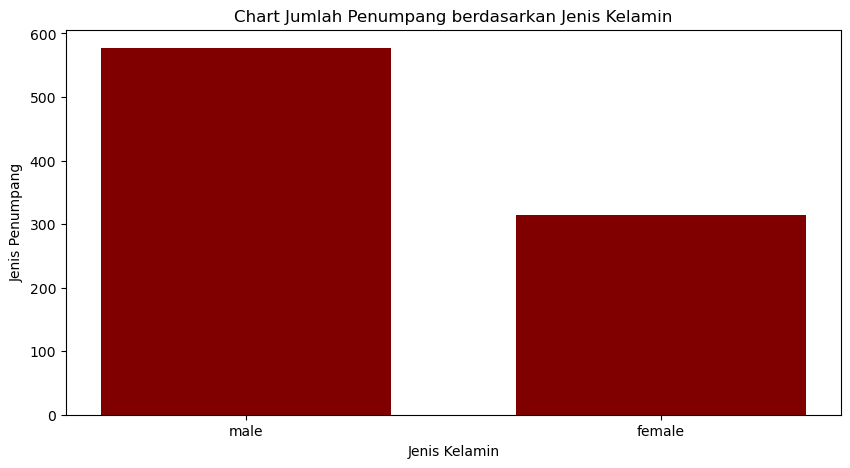

In [30]:
fig = plt.figure(figsize = (10, 5))
plt.bar(index_sex, values_sex, color="maroon", width = 0.7)

plt.xlabel("Jenis Kelamin")
plt.ylabel("Jenis Penumpang")
plt.title("Chart Jumlah Penumpang berdasarkan Jenis Kelamin")

plt.show()

In [31]:
# Terlihat jumlah laki-laki lebih banyak daripada perempuan

#

In [33]:
# Selanjutnya, akan dibentuk sebuah fungsi untuk otomatisasi pembuatan chart

def barchart(column):
    count = data_train[column].value_counts()

    index = count.index
    values = count.values

    fig = plt.figure(figsize = (7, 5))
    plt.bar(index, values, color="maroon", width=0.7)

    plt.show()

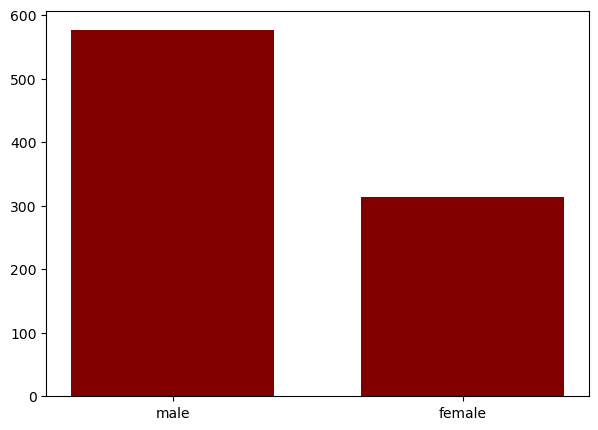

In [34]:
barchart('Sex')

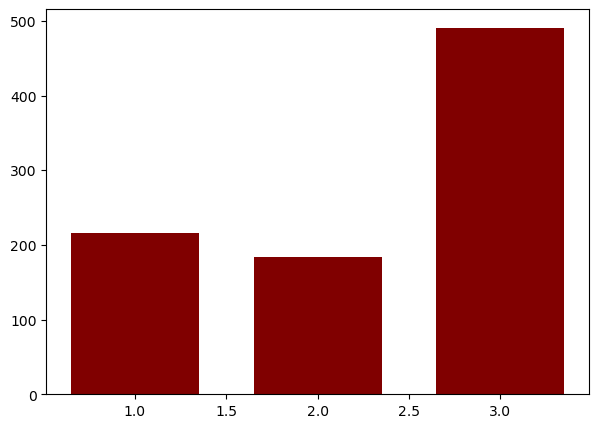

In [35]:
barchart('Pclass')

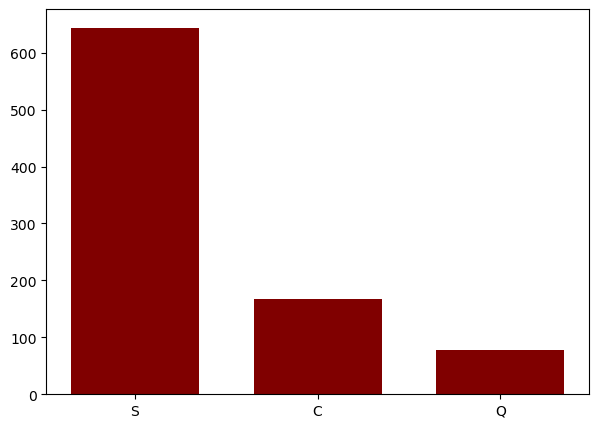

In [36]:
barchart('Embarked')

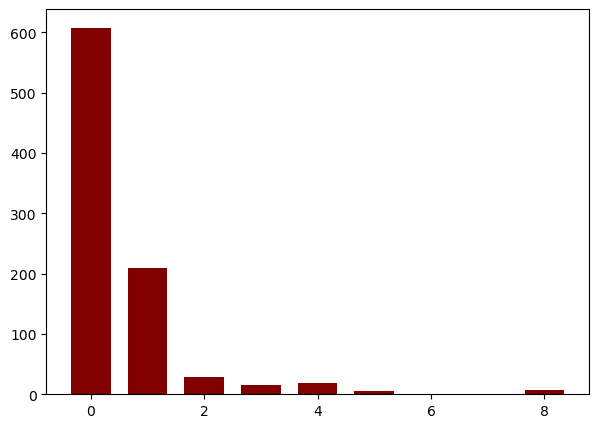

In [37]:
barchart('SibSp')

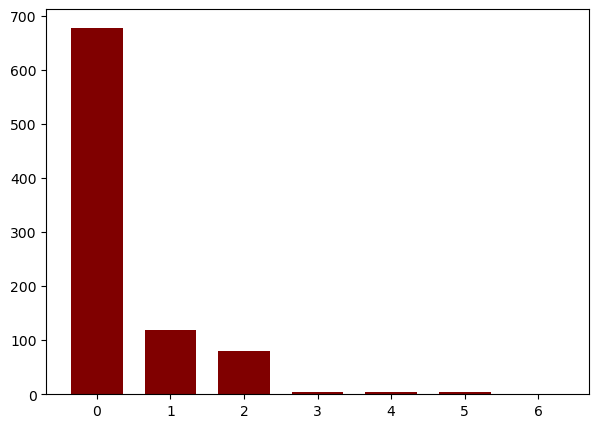

In [38]:
barchart('Parch')

#

In [40]:
# Akan dilakukan analisis untuk mengetahui kriteria-kriteria yang meninggal dan yang selamat menggunakan teknik pengelompokkan barchart

In [41]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Akan dianalisis kematian berdasarkan jenis kelamin

def group_barchart(column):
    survived = data_train.groupby(["Survived", column]).count()['PassengerId'].reset_index()

    g = sns.catplot(
        data = survived, kind = 'bar',
        x = "Survived", y = "PassengerId", hue = column,
        palette = "dark", height = 6
    )

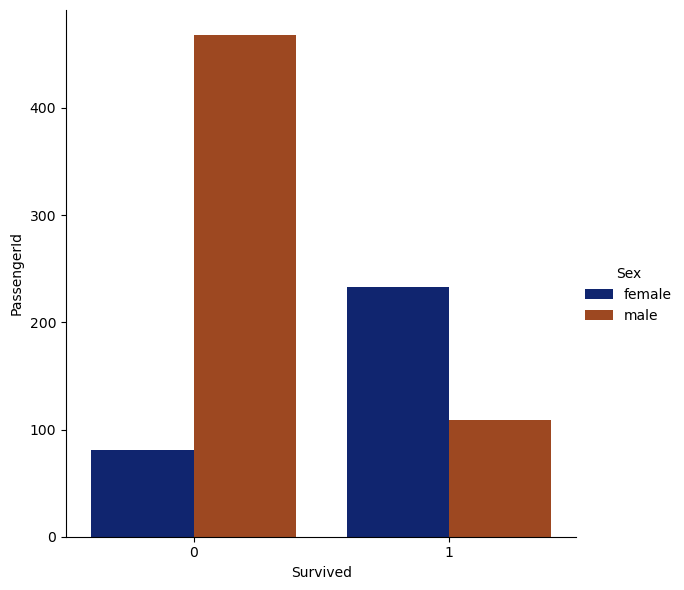

In [43]:
group_barchart("Sex")

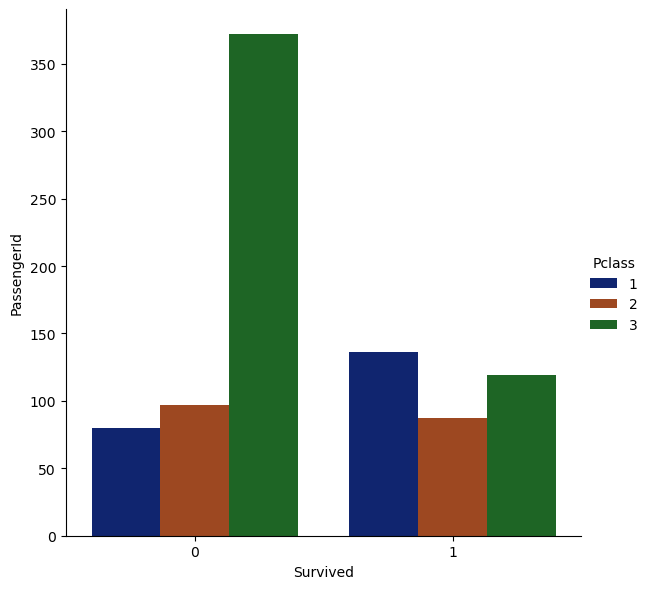

In [44]:
group_barchart("Pclass")

### Histogram

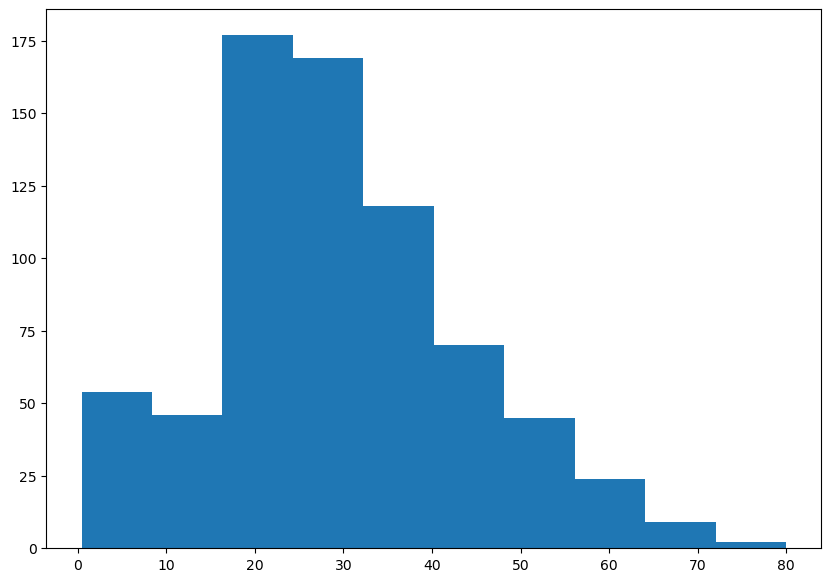

In [46]:
# Lalu, akan dilakukan analisis menggunakan histogram

fig , ax = plt.subplots(figsize = (10, 7))

ax.hist(data_train.Age)

plt.show()

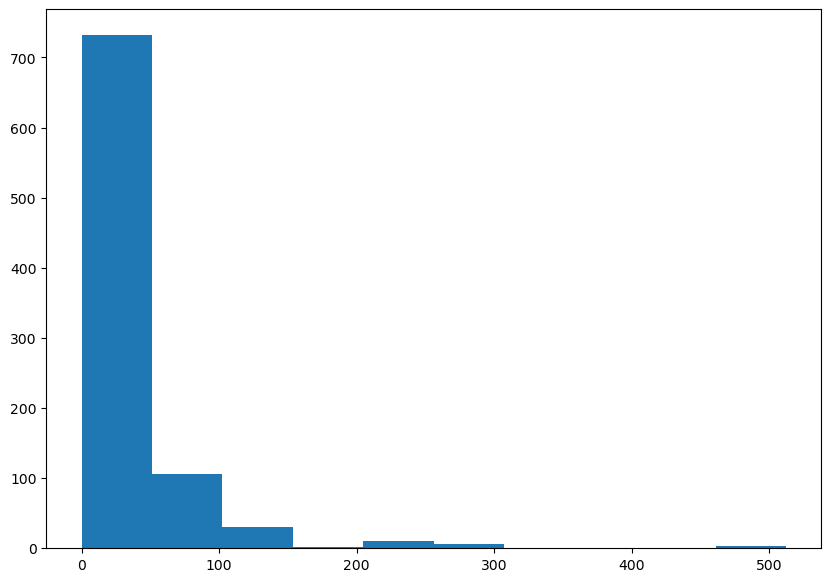

In [47]:
fig , ax = plt.subplots(figsize = (10, 7))

ax.hist(data_train.Fare)

plt.show()

### KDE Plot

C:\Users\Leonardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Leonardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


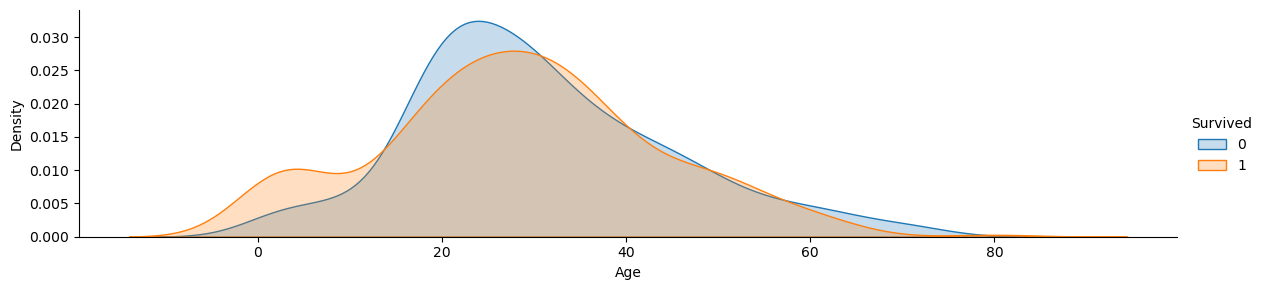

In [49]:
facet = sns.FacetGrid(data_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
plt.show()

C:\Users\Leonardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Leonardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


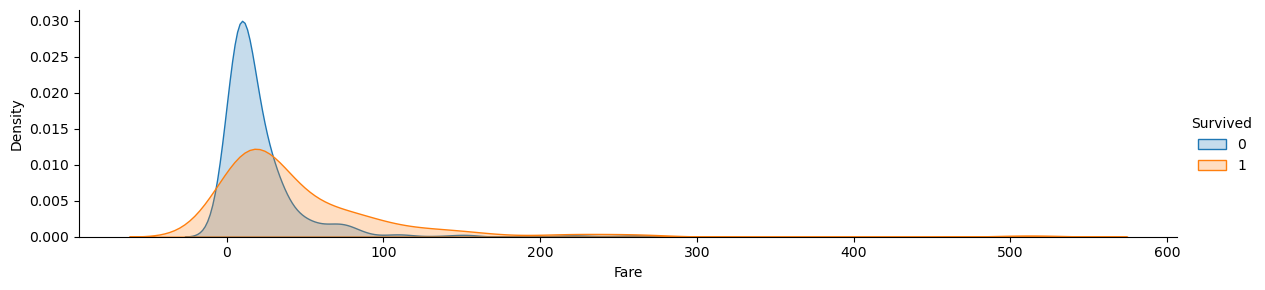

In [50]:
facet = sns.FacetGrid(data_train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.add_legend()
plt.show()

#

# Preprocessing Data

#### Selannjutnya, akan dilakuka proses "Fill/Drop Missing Value"

In [54]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Value Data Embarked

In [59]:
# Akan diisi missing value dari data kategorik

data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [60]:
 data_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [61]:
modus_embarked = data_train['Embarked'].mode()[0]
modus_embarked

'S'

In [62]:
data_train['Embarked'] = data_train['Embarked'].fillna(modus_embarked)

In [63]:
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [64]:
data_train[data_train['Embarked'].index == 61]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


Missing Value Data Age

In [66]:
# Akan diisi missing value data kategorik selanjutnya

mean_age = data_train['Age'].mean()
mean_age

29.69911764705882

In [67]:
data_train['Age'] = data_train['Age'].fillna(mean_age)

In [68]:
mean_age_test = data_test['Age'].fillna(mean_age)

In [69]:
mean_age_test = data_test['Age'].mean()
mean_age_test

30.272590361445783

In [70]:
data_test['Age'] = data_test['Age'].fillna(mean_age_test)

Missing Value Data Fare

In [72]:
mean_fare_test = data_test['Fare'].mean()

data_test['Fare'] = data_test['Fare'].fillna(mean_fare_test)

### Selanjutnya, kita akan mengdrop data Cabin karena terlalu banyak missing

In [74]:
data_train = data_train.drop(['Cabin'], axis =1)
data_test = data_test.drop(['Cabin'], axis =1)

In [75]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [76]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#

# Converting Data

In [79]:
# Binary Converting 

sex_mapping = {"male" : 1, "female" : 0}

data_train["Sex"] = data_train["Sex"].map(sex_mapping)
data_test["Sex"] = data_test["Sex"].map(sex_mapping)

In [80]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


#

In [82]:
# One Hot Encoding

embarked = data_train[['Embarked']]

dumies = pd.get_dummies(embarked)

dumies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [83]:
data_train = pd.merge(data_train.reset_index(), dumies.reset_index())
data_train = data_train.drop(['index'], axis = 1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,False,False,True


In [84]:
embarked_test = data_test[['Embarked']]

dumies_test = pd.get_dummies(embarked_test)

In [85]:
data_test = pd.merge(data_test.reset_index(), dumies_test.reset_index())

data_test = data_test.drop(['index', 'Embarked'], axis = 1)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,False,True,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,False,False,True


#

In [87]:
# Extract Data Title From Name and Convert Title
# Ordinal Converting

data_train['Title'] = data_train['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11992\487883871.py:4: SyntaxWarning: invalid escape sequence '\.'
  data_train['Title'] = data_train['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)


In [88]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,False,False,True,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,True,False,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,False,False,True,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,False,False,True,Mr


In [89]:
title_mapping = {"Mr" : 0, #ordinal convert
                 "Miss" : 1,
                 "Mrs" : 2,
                 "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mile" : 3, "Countess": 3,
                 "Ms" : 3, "Lady" : 3, "Jonkheer" : 3, "Don" : 3, "Dona" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3}

data_train['Title'] =  data_train['Title'].map(title_mapping)

In [90]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,False,False,True,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,True,False,False,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,False,False,True,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,False,False,True,0.0


In [91]:
data_test['Title'] = data_test['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11992\1918183282.py:1: SyntaxWarning: invalid escape sequence '\.'
  data_test['Title'] = data_test['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)


In [92]:
title_mapping_test = {"Mr" : 0, #ordinal convert data test
                 "Miss" : 1,
                 "Mrs" : 2,
                 "Master" : 3, "Dr" : 3, "Rev" : 3, "Col" : 3, "Major" : 3, "Mile" : 3, "Countess": 3,
                 "Ms" : 3, "Lady" : 3, "Jonkheer" : 3, "Don" : 3, "Dona" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3}

data_test['Title'] =  data_test['Title'].map(title_mapping_test)

In [93]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,False,True,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,False,False,True,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,False,True,False,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,False,False,True,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,False,False,True,2


#

# Cleaning Data

In [96]:
data_train.shape, data_test.shape

((891, 15), (418, 13))

In [97]:
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test_id = data_test[['PassengerId']] # Disimpan untuk digunakan di prediction

data_test = data_test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
data_train = data_train.drop(['Embarked'], axis = 1)

In [98]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,False,False,True,0.0
1,1,1,0,38.0,1,0,71.2833,True,False,False,2.0
2,1,3,0,26.0,0,0,7.9250,False,False,True,1.0
3,1,1,0,35.0,1,0,53.1000,False,False,True,2.0
4,0,3,1,35.0,0,0,8.0500,False,False,True,0.0


In [99]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,False,True,False,0
1,3,0,47.0,1,0,7.0000,False,False,True,2
2,2,1,62.0,0,0,9.6875,False,True,False,0
3,3,1,27.0,0,0,8.6625,False,False,True,0
4,3,0,22.0,1,1,12.2875,False,False,True,2


#

# Modelling

In [102]:
# Modelling dimulai dengan membentuk data Training dan data Testing
# Training dibagi dua, yaitu Train Validation dan Validation

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [103]:
data_train.shape, data_test.shape

((891, 11), (418, 10))

In [104]:
training = data_train.drop("Survived", axis = 1)
target = data_train['Survived']

In [113]:
training.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Title         2
dtype: int64

In [115]:
training['Title'] = training['Title'].fillna(3)

In [117]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, training, target, cv = k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [119]:
score.mean()

0.7991212102190698

In [121]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, training, target, cv = k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74301676 0.78651685 0.79213483 0.76404494 0.78651685]


In [123]:
score.mean()

0.7744460485845208

#

# Prediction

In [126]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,False,True,False,0
1,3,0,47.0,1,0,7.0000,False,False,True,2
2,2,1,62.0,0,0,9.6875,False,True,False,0
3,3,1,27.0,0,0,8.6625,False,False,True,0
4,3,0,22.0,1,1,12.2875,False,False,True,2


In [130]:
clf = GaussianNB()
clf.fit(training, target)

GaussianNB()

In [134]:
prediction = clf.predict(data_test)

In [140]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
                "PassengerId" : df_test["PassengerId"],
                "Survived" : prediction
            })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [142]:
submission.to_csv("submit.csv", index = False)

In [144]:
data_test['Survived'] = submission['Survived']
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,1,34.5,0,0,7.8292,False,True,False,0,0
1,3,0,47.0,1,0,7.0000,False,False,True,2,1
2,2,1,62.0,0,0,9.6875,False,True,False,0,0
3,3,1,27.0,0,0,8.6625,False,False,True,0,0
4,3,0,22.0,1,1,12.2875,False,False,True,2,1
